# Credit Risk Modelling

##Predicting load default

In [1]:
# @ auther:
# @ date :
# @ modification log
#----------------------------------------------------------------------------------------------------------------------
# Date              Description
#------------------------------------------------------------------------------------------------------------------

In [2]:
import os

In [3]:
os.getcwd()

'/home/sayali/github/CaseStudy'

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
train = pd.read_csv('data/train_credit_risk_modelling.csv')
test = pd.read_csv('data/test_loanDefault.csv')

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

Our first aim is to look for no or rows in dataset

Next immidiately look for data disctionary, if not given create one.

In [11]:
train.head()
#print("Number of rows =%d", %len(train))
#print("Number of cols =%d", %len(train.columns))

# Data type of no of rows and no of columns could spill over int64 but it will never be -ve i.e. signed so data type 
# could be un-signed integer use of %d can be replaced
print("Number of rows =%d and cols =%d" %(train.shape[0], train.shape[1]))

Number of rows =614 and cols =13


In [12]:
# get data describtion of categorical -

train.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002205,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [13]:
# as sel_employed has some missing values so value count will not match to total row count
print("Self_Employed : ", train['Self_Employed'].value_counts(dropna=False))
print("LoanAmount : ", train['LoanAmount'].value_counts(dropna=False))
print("Loan_Amount_Term : ", train['Loan_Amount_Term'].value_counts(dropna=False))


Self_Employed :  No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
LoanAmount :  NaN       22
 120.0    20
 110.0    17
 100.0    15
 160.0    12
 187.0    12
 128.0    11
 113.0    11
 130.0    10
 96.0      9
 95.0      9
 115.0     8
 112.0     8
 70.0      8
 150.0     7
 125.0     7
 136.0     7
 132.0     7
 104.0     7
 135.0     7
 116.0     6
 81.0      6
 175.0     6
 180.0     6
 144.0     6
 80.0      6
 155.0     6
 90.0      6
 158.0     6
 138.0     6
          ..
 54.0      1
 436.0     1
 250.0     1
 304.0     1
 280.0     1
 42.0      1
 72.0      1
 240.0     1
 214.0     1
 59.0      1
 308.0     1
 236.0     1
 380.0     1
 296.0     1
 208.0     1
 119.0     1
 500.0     1
 246.0     1
 234.0     1
 86.0      1
 230.0     1
 190.0     1
 178.0     1
 218.0     1
 62.0      1
 360.0     1
 53.0      1
 65.0      1
 156.0     1
 89.0      1
Name: LoanAmount, Length: 204, dtype: int64
Loan_Amount_Term :   360.0    512
 180.0     44
 480.0     15
NaN

In [14]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Observations -
1. Loan amount has ( 614 - 592 = ) 22 missing values
2. Loan amount Term has 14 missing values
3. Credit history has 50 missing values
4. About 84 % of candidate has credit history
5. ApplicantsIncome and co applicant income data need to be studied for its distribution

In [15]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
import pandas as pd

from bokeh.layouts import gridplot
from bokeh.charts import Line, show, output_file, defaults

defaults.plot_width = 450
defaults.plot_height = 400
line = Line(train)
line0 = Line(train, y=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
             title="Interpreters (y=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])", ylabel='Amount', legend=True)

#output_file("line_multi.html", title="line examples")

#show(gridplot( line0, ncols=1))
gridplot( line0, ncols=1)

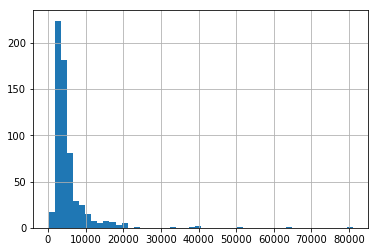

In [22]:
%matplotlib inline
train['ApplicantIncome'].hist(bins=50)

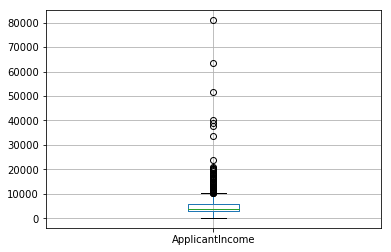

In [23]:
train.boxplot(column='ApplicantIncome')


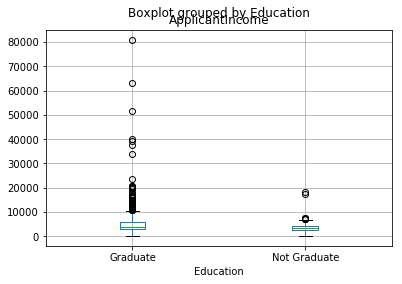

In [24]:
train.boxplot(column='ApplicantIncome', by='Education')

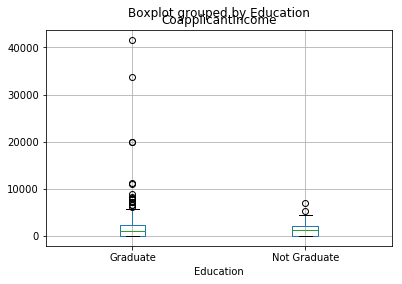

In [25]:
train.boxplot(column='CoapplicantIncome', by='Education')

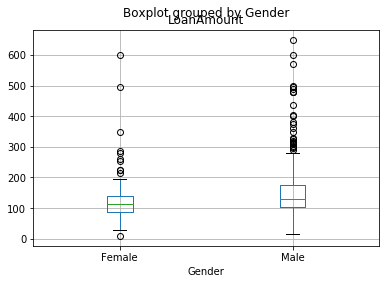

In [26]:
train.boxplot(column='LoanAmount', by='Gender')

As there are more males who took large loan than female

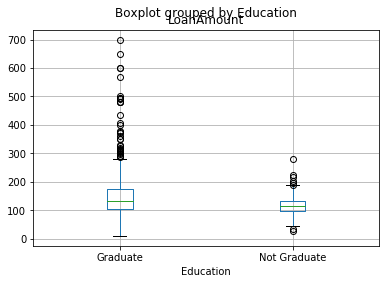

In [27]:
train.boxplot(column='LoanAmount', by='Education')

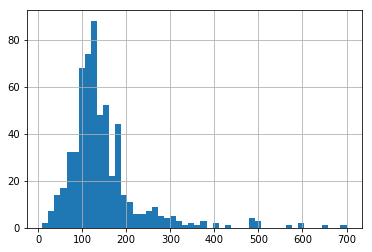

In [28]:
train['LoanAmount'].hist(bins=50)

In [29]:
temp1 = train['Credit_History'].value_counts(ascending= True)

In [30]:
temp2 = train.pivot_table(values = 'Loan_Status', index=['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())

In [31]:
print("Frequency table of Credit History : ")
print( temp1)
print('Probability of getting loan for each credit history class : ')
print(temp2)

Frequency table of Credit History : 
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting loan for each credit history class : 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


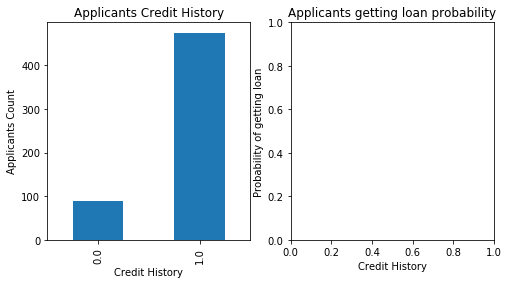

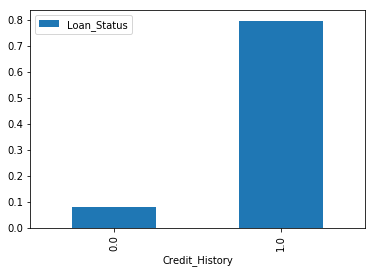

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Applicants Count')
ax1.set_title('Applicants Credit History')
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Applicants getting loan probability')
temp2.plot(kind='bar')


Above 2 plots can be combined in one single plot using crosstab

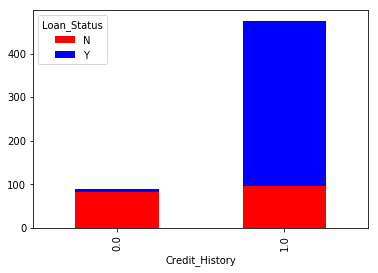

In [33]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked = True, color=['red','blue'],grid=False)

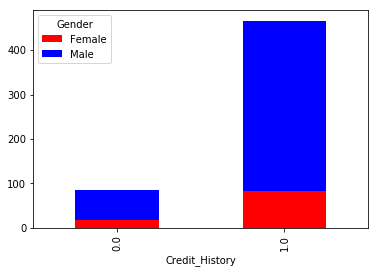

In [34]:
temp3 = pd.crosstab(train['Credit_History'], train['Gender'])
temp3.plot(kind='bar', stacked = True, color=['red','blue'],grid=False)

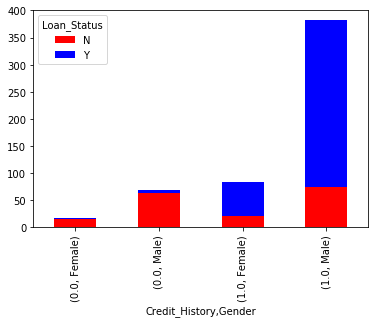

In [35]:
temp4 = pd.crosstab([train['Credit_History'],train['Gender']], train['Loan_Status'])
temp4.plot(kind='bar', stacked = True, color=['red','blue'],grid=False)

## Data Munging
Cleaning data here

In [36]:
train.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
#Imputing missing loan amount values

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)

In [38]:
train.apply(lambda x:sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loanamount is replaced.

In [39]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [40]:
#Impute  Self_Employed
train['Self_Employed'].fillna('No', inplace = True)

In [41]:
table = train.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [44]:
#This fnction will return values from above pivote avle for given x
x = ('a', 'b')

def fage(x):
    if x['Self_Employed'].isnull() & x['Education'].isnull() :
        pass
    else:
        return table.loc(x['Self_Employed'], x['Education'])


In [45]:
type(fage(train.iloc[:1,:]))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [46]:
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage,axis=1), inplace=True)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

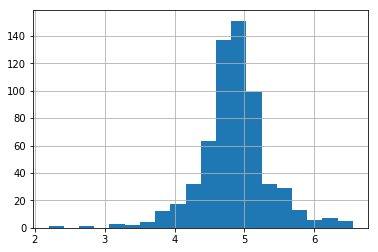

In [47]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

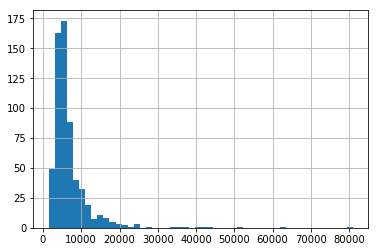

In [48]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome'].hist(bins=50)

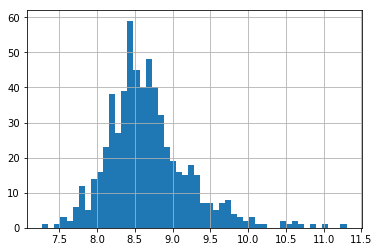

In [49]:
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=50)

In [50]:
# Impute missing values for gender, married, loan amount term, Dependents, credit_history

# As majority of gender is male fill na with male, same for self employed
# Loan amount term by majority terms
# Credit history will fill with 1 as it is majority


In [51]:
train['Gender'].fillna('Male', inplace = True)

In [52]:
train['Self_Employed'].fillna('No', inplace = True)

In [53]:
train['Married'].fillna('Yes', inplace = True)

In [54]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [55]:
train['Dependents'].fillna('0', inplace = True)

In [56]:
train['Credit_History'].fillna(1, inplace=True)

In [57]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [58]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [59]:
print(train['Loan_Amount_Term'].value_counts())
print(train['Loan_Amount_Term'].median())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
360.0


In [60]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace =True)

#Modeling

In [61]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed','Property_Area', 'Loan_Status']

In [62]:
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import KFold
from sklearn import metrics

/home/sayali/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
def classification_model(model, data, predictors, outcome):
    
    #fit model
    model.fit(data[predictors], data[outcome])
    
    #predict using model
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print(" Accuracy is", accuracy)
    
    # k-fold cross validation
    kf = KFold(data.shape[0], n_folds= 5)
    
    error =[]
    
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:]) 
        train_target = (data[outcome].iloc[train])
        
        test_predictors = (data[predictors].iloc[test,:])
        test_target = (data[outcome].iloc[test])
        
        model.fit(train_predictors, train_target)
        
        #error on the test data from k-fold
        temp = model.score(test_predictors, test_target)
        
        error.append(temp)
        
    print("Cross validation score: %s"% np.mean(error))
        

logistic Regression

In [65]:
outcome = 'Loan_Status'

predictor_var = ['Credit_History', 'Gender', 'Married', 'Education']
logit_model = LogisticRegression()
classification_model(logit_model, train, predictor_var, outcome)
logit_model.coef_

 Accuracy is 0.809446254072
Cross validation score: 0.809462881514


array([[ 2.95810819, -0.05460018,  0.3490217 , -0.34241156]])

In [66]:
#Decision Tree

dt_model = DecisionTreeClassifier()

predictor_var = ['Credit_History', 'Gender', 'Married', 'Education']

classification_model(dt_model, train, predictor_var,outcome)


 Accuracy is 0.809446254072
Cross validation score: 0.809462881514


Random Forest

In [67]:
rf_model = RandomForestClassifier()

predictor_var = ['Credit_History', 'Gender', 'Married', 'Education', 'Property_Area', 'TotalIncome_log']
classification_model(rf_model, train, predictor_var, outcome)

 Accuracy is 0.975570032573
Cross validation score: 0.697054511529


Above rf model says it is overfitted, as Accuracy is increased but cross validation is reduced

This is good example to tell that always you don't need complex algorith to implement'

# Feature importance

In [68]:
featureImportance = pd.Series(rf_model.feature_importances_, index= predictor_var).sort_values(ascending = False)

In [69]:
print(featureImportance)

TotalIncome_log    0.606581
Credit_History     0.275674
Property_Area      0.052193
Married            0.027991
Gender             0.023554
Education          0.014007
dtype: float64


Freature importance cleary says it is overfitted we do not need these many features in our model.

In [70]:
rf_model1 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_History', 'Gender', 'Married', 'Education', 'Property_Area', 'TotalIncome_log']
classification_model(rf_model1, train, predictor_var, outcome)

 Accuracy is 0.827361563518
Cross validation score: 0.804598160736


By controlling some of the model parameters we can manage overfitting
e.g. n_estimators = how may desision tree it can creates